In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import csv
import re
import lxml
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Scrape products from Etsy

In [52]:
#scrape paracord bracelet in 'Woven & Braided Bracelets' category
#no ads
#scrape on Oct 29,2020
bracelet_urls = []
for i in range(0,20):
    page = requests.get('https://www.etsy.com/ca/search/jewelry/bracelets/woven-and-braided-bracelets?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&plkey=2bc137b2b1a3a80ed8dd69910aaa78e90c685767%3A636978552&pro=1&explicit=1&q=paracord+bracelet&ref=pagination&page='+str(i))
    soup = BeautifulSoup(page.content, 'html.parser')
    for a in soup.find_all('a', href=True): 
        find_link = re.findall(r"^https://www.etsy.com/ca/listing/[0-9]+/.+$",a['href'])
        if find_link != []:
            bracelet_urls.append(find_link)

In [53]:
len(bracelet_urls)

944

In [54]:
np.savetxt('bracelet_urls.txt',bracelet_urls, newline = "\n", fmt = '%s')

In [55]:
urls_list = open("bracelet_urls.txt").read().splitlines()

In [56]:
urls_list[0:5]

['https://www.etsy.com/ca/listing/802855610/zero-paracord-menwomen-fashion-bracelet?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-1-1&organic_search_click=1',
 'https://www.etsy.com/ca/listing/564288213/black-paracord-survival-bracelet-w?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-1-2&organic_search_click=1&frs=1&col=1',
 'https://www.etsy.com/ca/listing/863216754/wide-cuffed-paracord-bracelet?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-1-3&organic_search_click=1&frs=1&col=1',
 'https://www.etsy.com/ca/listing/826605774/stylish-paracord-bracelet?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-1-4&organic_search_click=1&col=1',
 'https://www.etsy.com/ca/listing/793491307/paracord-7-bracelets?ga_order=most_relevant&ga_search_t

In [58]:
len(urls_list)

944

In [46]:
#origin
def bracelet_information(bracelet_urls):
    header = []
    price_cad = []
    sales = []
    seller = []
    details = []
    description = []
    available = []
    no_reviews = []
    reviews = []
    ready_to_dispatch = []
    delivery_cost = []
    return_exchange = []

    for link in bracelet_urls:
        page = requests.get(link[0])
        soup = BeautifulSoup(page.content, 'html.parser')
    
        #header
        header_info = soup.find("h1").text.strip()
        header.append(header_info)
        
        #price
        price_cad_info = soup.find("p",{"class":'wt-text-title-03 wt-mr-xs-2'}).text
        price_cad_info = float(re.search('[0-9]+\.[0-9]+',price_cad_info.strip()).group())
        price_cad.append(price_cad_info)
    
        #sales
        sales_info = soup.find("a",{'class':'wt-text-link-no-underline wt-display-inline-flex-xs wt-align-items-center'})
        sales_info = [float(sales_info.text.replace('\n','').replace(",","").split()[0]) if sales_info is not None else 0]
        sales.append(sales_info)
        
        #seller
        seller_info = soup.find("p",{'class':'wt-text-body-01 wt-mr-xs-1'}).text.strip()
        seller.append(seller_info)
        
        #details
        details_info = soup.find("ul",{'class':'wt-text-body-01'})
        details_info = [details_info.text.strip().split("\n\n\n") if details_info is not None else 'No info']
        details.append(details_info)
        
        #description
        description_info = soup.find("p",{'class':'wt-text-body-01 wt-break-word'}).text.replace('_','').replace('✽','').strip()
        description.append(description_info)
        
        #availability
        available_info = soup.find("p",{'class': 'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1 wt-text-brick'})
        if available_info is None:
            available_info = soup.find("p",{'class':'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1'})
        available.append(available_info.text)
        
        #number of reviews
        no_reviews_info = soup.find("h3",{'class':'wt-text-body-03'})
        no_reviews_info = [re.search('^[0-9]+',no_reviews_info.text).group() if no_reviews_info is not None else 'No review']
        no_reviews.append(no_reviews_info)
        
        #customer reviews
        reviews_info = soup.find_all("p",{'class':'wt-text-truncate--multi-line wt-break-word'})
        reviews_info = [i.text.strip() for i in reviews_info]
        reviews.append(reviews_info)
        
        #ready to dispatch
        ready_to_dispatch_info = soup.find("p",{'class':'wt-text-body-03 wt-mt-xs-1 wt-line-height-tight'}).text.replace(' business days','')
        ready_to_dispatch.append(ready_to_dispatch_info)
        
        #ready to dispatch, delivery cost, return or exchange
        try:
            info = soup.find("p",{'class':'wt-text-body-03 wt-mt-xs-1 wt-line-height-tight'}).text
            ready_to_dispatch_info = info[0]
            delivery_cost_info = info[1]
            return_exchange_info = info[2]
        
        except:
            return_exchange_info = 'No info'
            
        ready_to_dispatch.append(ready_to_dispatch_info)
        delivery_cost.append(delivery_cost_info)
        return_exchange.append(return_exchange_info)
        
    return header,price_cad,sales,seller,details,description,available,no_reviews,reviews,ready_to_dispatch,delivery_cost,return_exchange

In [46]:
#draft
def bracelet_information(bracelet_urls):
    header = []
    price_cad = []
    sales = []
    seller = []
    details = []
    description = []
    available = []
    no_reviews = []
    reviews = []
    ready_to_dispatch = []
    delivery_cost = []
    return_exchange = []

    for link in bracelet_urls:
        page = requests.get(link[0])
        soup = BeautifulSoup(page.content, 'html.parser')
    
        #header
        try:
            header_info = soup.find("h1").text.strip()
            header.append(header_info)
        except:
            print(link)
        
        #price
        price_cad_info = soup.find("p",{"class":'wt-text-title-03 wt-mr-xs-2'}).text
        price_cad_info = float(re.search('[0-9]+\.[0-9]+',price_cad_info.strip()).group())
        price_cad.append(price_cad_info)
    
        #sales
        sales_info = soup.find("a",{'class':'wt-text-link-no-underline wt-display-inline-flex-xs wt-align-items-center'})
        sales_info = [float(sales_info.text.replace('\n','').replace(",","").split()[0]) if sales_info is not None else 0]
        sales.append(sales_info)
        
        #seller
        seller_info = soup.find("p",{'class':'wt-text-body-01 wt-mr-xs-1'}).text.strip()
        seller.append(seller_info)
        
        #details
        details_info = soup.find("ul",{'class':'wt-text-body-01'})
        details_info = [details_info.text.strip().split("\n\n\n") if details_info is not None else 'No info']
        details.append(details_info)
        
        #description
        description_info = soup.find("p",{'class':'wt-text-body-01 wt-break-word'}).text.replace('_','').replace('✽','').strip()
        description.append(description_info)
        
        #availability
        available_info = soup.find("p",{'class': 'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1 wt-text-brick'})
        if available_info is None:
            available_info = soup.find("p",{'class':'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1'})
        available.append(available_info.text)
        
        #number of reviews
        no_reviews_info = soup.find("h3",{'class':'wt-text-body-03'})
        no_reviews_info = [re.search('^[0-9]+',no_reviews_info.text).group() if no_reviews_info is not None else 'No review']
        no_reviews.append(no_reviews_info)
        
        #customer reviews
        reviews_info = soup.find_all("p",{'class':'wt-text-truncate--multi-line wt-break-word'})
        reviews_info = [i.text.strip() for i in reviews_info]
        reviews.append(reviews_info)
        
        #ready to dispatch
        ready_to_dispatch_info = soup.find("p",{'class':'wt-text-body-03 wt-mt-xs-1 wt-line-height-tight'}).text.replace(' business days','')
        ready_to_dispatch.append(ready_to_dispatch_info)
        
        #ready to dispatch, delivery cost, return or exchange
        try:
            info = soup.find("p",{'class':'wt-text-body-03 wt-mt-xs-1 wt-line-height-tight'}).text
            ready_to_dispatch_info = info[0]
            delivery_cost_info = info[1]
            return_exchange_info = info[2]
        
        except:
            return_exchange_info = 'No info'
            
        ready_to_dispatch.append(ready_to_dispatch_info)
        delivery_cost.append(delivery_cost_info)
        return_exchange.append(return_exchange_info)
        
    return header,price_cad,sales,seller,details,description,available,no_reviews,reviews,ready_to_dispatch,delivery_cost,return_exchange

### 1. Get header

In [32]:
def get_header(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    header = soup.find("h1").text.strip()
    return header

In [59]:
header = list(map(get_header,urls_list))

In [60]:
len(header)

944

In [67]:
np.savetxt('header.txt',header, newline = "\n", fmt = '%s',encoding='utf-8')

In [69]:
header = open("header.txt",encoding='utf-8').read().splitlines()

### 2. Get price

In [71]:
def get_price(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    price_cad = soup.find("p",{"class":'wt-text-title-03 wt-mr-xs-2'}).text
    price_cad = float(re.search('[0-9]+\.[0-9]+',price_cad.strip()).group())
    return price_cad

In [72]:
price = list(map(get_price,urls_list))

In [73]:
len(price)

944

### 3. Get sales

In [77]:
def get_sales(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    sales = soup.find("a",{'class':'wt-text-link-no-underline wt-display-inline-flex-xs wt-align-items-center'})
    sales = [float(sales.text.replace('\n','').replace(",","").split()[0]) if sales is not None else 0]
    return sales

In [78]:
sales = list(map(get_sales,urls_list))

In [79]:
len(sales)

944

In [86]:
sales = [i[0] for i in sales]

In [93]:
sales[:50]

[121.0,
 169.0,
 1.0,
 29.0,
 179.0,
 29.0,
 719.0,
 6897.0,
 2728.0,
 1236.0,
 2137.0,
 2.0,
 2137.0,
 1981.0,
 719.0,
 1549.0,
 3590.0,
 514.0,
 106.0,
 2728.0,
 719.0,
 2137.0,
 1236.0,
 313.0,
 3590.0,
 2137.0,
 2728.0,
 1223.0,
 169.0,
 13.0,
 2287.0,
 198.0,
 48.0,
 980.0,
 2287.0,
 198.0,
 1220.0,
 2728.0,
 2.0,
 175.0,
 1236.0,
 1236.0,
 179.0,
 63.0,
 5151.0,
 1762.0,
 440.0,
 71.0,
 121.0,
 169.0]

### 4. Get seller

In [97]:
def get_sellers(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    return soup.find("p",{'class':'wt-text-body-01 wt-mr-xs-1'}).text.strip()

In [98]:
sellers = list(map(get_sellers,urls_list))

In [99]:
len(sellers)

944

In [100]:
sellers[:50]

['blacksquirrel2019',
 'SterlingSurvival',
 'GorillaCordzCanada',
 'BraceletsandbeyondCa',
 'BrigsSandP',
 'BraceletsandbeyondCa',
 'Paracordprojectsuk',
 'ArtEngravingStudio',
 'NightWeaverCreations',
 'ALEXPEDITION',
 'SimpleParadise',
 'TonyDIY',
 'SimpleParadise',
 'VikingJewelryPlace',
 'Paracordprojectsuk',
 'StuffByColleenCanada',
 'KennlyDesign',
 'Cordbraid',
 'LadyLiJewellery',
 'NightWeaverCreations',
 'Paracordprojectsuk',
 'SimpleParadise',
 'ALEXPEDITION',
 'TheParacordSociety',
 'KennlyDesign',
 'SimpleParadise',
 'NightWeaverCreations',
 'RockNShore',
 'SterlingSurvival',
 'TheParacordCrow',
 'mikadojewels',
 'BijouxBohemesBloom',
 'CreativeTwines',
 'UKForcesGifts',
 'mikadojewels',
 'BijouxBohemesBloom',
 'FlashfireSupply',
 'NightWeaverCreations',
 'DragonClawStore',
 'GoKanji',
 'ALEXPEDITION',
 'ALEXPEDITION',
 'BrigsSandP',
 'ArbutusCoast',
 'BeadUpStudio',
 'CharlyBeeDesigns',
 'OneTrueNorthDesigns',
 'Extatics',
 'blacksquirrel2019',
 'SterlingSurvival']

### 5. Get details

In [89]:
def get_details(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    details = soup.find("ul",{'class':'wt-text-body-01'})
    details = [details.text.strip().split("\n\n\n") if details is not None else 'No info']
    return details

In [90]:
details = list(map(get_details,urls_list))

In [95]:
details = [i[0] for i in details]

In [91]:
len(details)

944

In [96]:
details[:50]

[['Handmade item', 'Materials: Nylon', 'Adjustable: Yes', 'Made to Order'],
 ['Handmade item',
  'Materials: Plastic',
  'Adjustable: No',
  'Closure: Buckle\n\nBracelet width: 7/8 Inches'],
 ['Handmade item',
  'Materials: Paracord',
  'Adjustable: No',
  'Closure: Buckle',
  'Made to Order'],
 ['Handmade item', 'Materials: Nylon', 'Adjustable: No', 'Closure: Buckle'],
 ['Handmade item',
  'Materials: Paracord',
  'Adjustable: No',
  'Closure: Buckle',
  'Can be personalised: Yes\n\nBracelet length: 7 Inches'],
 ['Handmade item', 'Materials: Nylon', 'Adjustable: No'],
 'No info',
 ['Handmade item\n\nBracelet width: 4 Millimetres\n\nMaterials: Polyester, Stainless steel',
  'Adjustable: Yes',
  'Can be personalised: Yes',
  'Made to Order'],
 'No info',
 ['Handmade item',
  'Materials: Paracord',
  'Adjustable: No',
  'Style: Celtic',
  'Can be personalised: No',
  'Made to Order'],
 ['Handmade item',
  'Materials: parachute cord, paracord, cord',
  'Closure: Slide clasp',
  'Adjustabl

### 6. Get description

In [107]:
def get_description(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    return soup.find("p",{'class':'wt-text-body-01 wt-break-word'}).text.replace('_','').replace('✽','').strip()

In [108]:
descriptions = list(map(get_description,urls_list))

In [109]:
len(descriptions)

944

In [110]:
descriptions[:50]

['ZERO by BlackSquirrel is an ultra-minimal bracelet to be used in your everyday. Although it is made in different sizes, thanks to a particular sliding knot, you can tighten it or enlarge it as you wish so you can find the perfect fit.Being adjustable it is an excellent gift idea when you do not know the wrist size of the person to whom the bracelet will go. The bracelet is handmade in our artisan workshop in Italy. The bracelet is in paracord 550 with over 50 colors available.Choose the right gift! Blacksquirrel ... clip your freedom!All Blacksquirrel accessories are made in Italy by hand and on commission. Once we receive your order, we will make a taylor made, unique, product with the colors  and size of your choice.IMPORTANTMeasure the circumference in the widest part of your wrist, where the bone protrudes. Use a sewing tape measure and wrap it around your wrist, not too tight, not too loose.Do not use other methods and do not measure other bracelets of yours.We ship worldwide. F

### 7. Get number of reviews

In [101]:
def get_num_reviews(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    num_reviews = soup.find("h3",{'class':'wt-text-body-03'})
    num_reviews = [re.search('^[0-9]+',num_reviews.text).group() if num_reviews is not None else 'No review']
    return num_reviews

In [102]:
num_reviews = list(map(get_num_reviews,urls_list))

In [103]:
len(num_reviews)

944

In [105]:
num_reviews = [i[0] for i in num_reviews]

In [106]:
num_reviews[:50]

['26',
 '20',
 'No review',
 '10',
 '34',
 '10',
 '111',
 '677',
 '471',
 '231',
 '241',
 'No review',
 '241',
 '395',
 '111',
 '181',
 '493',
 '96',
 '36',
 '471',
 '111',
 '241',
 '231',
 '78',
 '493',
 '241',
 '471',
 '111',
 '20',
 '5',
 '116',
 '33',
 '1',
 '116',
 '116',
 '33',
 '142',
 '471',
 'No review',
 '35',
 '231',
 '231',
 '34',
 '6',
 '710',
 '189',
 '89',
 '8',
 '26',
 '20']

### 8. Get availability

In [116]:
def get_availability(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    availability = soup.find("p",{'class': 'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1 wt-text-brick'})
    if availability is None:
        availability = soup.find("p",{'class':'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1'})
    return availability.text

In [117]:
availability = list(map(get_availability,urls_list))

In [118]:
len(availability)

944

In [119]:
availability[:50]

['In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Low in stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Low in stock',
 'Low in stock',
 'Only 1 available',
 'In stock',
 'Low in stock',
 'In stock',
 'In stock',
 'Only 1 available',
 'Low in stock',
 'Low in stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Low in stock',
 'Low in stock',
 'In stock',
 'Low in stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Low in stock',
 'Only 1 available',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock']

### 9. ready to dispatch, delivery cost, return or exchange

In [122]:
def get_availability(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')  
    info = soup.find("p",{'class':'wt-text-body-03 wt-mt-xs-1 wt-line-height-tight'}).text
    return info

In [123]:
info = list(map(get_availability,urls_list))

In [124]:
info

['09-19 Nov. ',
 '1–3 business days',
 '1–3 business days',
 'CA$2.00',
 '1–3 business days',
 '03-24 Nov. ',
 '04-17 Nov. ',
 '20 Nov.-01 Dec. ',
 '3–5 business days',
 '3–4 weeks',
 '3–5 business days',
 '1–2 business days',
 '3–5 business days',
 '10 Nov.-01 Dec. ',
 '04-17 Nov. ',
 '03-24 Nov. ',
 '1 business day',
 '12-23 Nov. ',
 '1–2 business days',
 '3–5 business days',
 '04-18 Nov. ',
 '3–5 business days',
 '3–4 weeks',
 '24 Nov.-03 Dec. ',
 '1 business day',
 '3–5 business days',
 '3–5 business days',
 '04-18 Nov. ',
 '1–3 business days',
 '1–3 business days',
 '17 Nov.-02 Dec. ',
 '1–3 business days',
 '10-16 Nov. ',
 '04-16 Nov. ',
 '17 Nov.-02 Dec. ',
 '1–3 business days',
 '1–2 business days',
 '3–5 business days',
 '19 Nov.-11 Dec. ',
 '1–2 business days',
 '3–4 weeks',
 '3–4 weeks',
 '1–3 business days',
 '1 business day',
 '03-23 Nov. ',
 '13-24 Nov. ',
 '3–5 business days',
 '1–3 business days',
 '09-19 Nov. ',
 '1–3 business days',
 '1–3 business days',
 'CA$2.00',
 

In [121]:
ready_to_dispatch,delivery_cost,return_exchange = list(map(get_availability,urls_list))

ValueError: too many values to unpack (expected 3)

In [ ]:
len(ready_to_dispatch)

In [ ]:
ready_to_dispatch[:50]

In [ ]:
header,price_cad,sales,seller,details,description,available,no_reviews,reviews,ready_to_dispatch,delivery_cost,return_exchange = bracelet_information(bracelet_urls)

['https://www.etsy.com/ca/listing/760341258/black-paracord-bracelet-with-brass-lion?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-23-25&organic_search_click=1&pro=1&frs=1']
['https://www.etsy.com/ca/listing/661368313/paracord-bracelet-color-black-chocolate?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-23-30&organic_search_click=1']
['https://www.etsy.com/ca/listing/656883715/550lbs-per-inch-paracord-bracelet-in?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-23-33&organic_search_click=1']
['https://www.etsy.com/ca/listing/762501773/4-strand-paracord-bracelet?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-23-35&organic_search_click=1']
['https://www.etsy.com/ca/listing/703034674/paracord-survival-bracelet-bear-grylls?ga_order=most

### Final product data

In [2]:
columns_name = ['header','price_cad','sales','seller','details','description','availability','num_reviews']
data_tuples = list(zip(header,price,sales,sellers,details,descriptions,availability,num_reviews))

#create dataframe
df = pd.DataFrame(data_tuples,columns = columns_name)

NameError: name 'header' is not defined

In [3]:
#df.to_csv('final_data.csv',index=False)
df = pd.read_csv('final_data.csv')

In [4]:
df.loc[df['num_reviews'] == 'No review','num_reviews'] = 0
df['num_reviews'] = df['num_reviews'].astype(int)

In [5]:
df[100:120]

,header,price_cad,sales,seller,details,description,availability,num_reviews
100,Paracord Bracelet,18.00,198.0,BijouxBohemesBloom,"['Handmade item', 'Materials: paracorde, corde...",Paracord Bracelet / adjustable / suitable for ...,Only 1 available,33
101,"Handmade bracelet, paracord bracelet, gift for...",24.51,313.0,TheParacordSociety,"['Handmade item', 'Materials: Nylon', 'Can be ...",Details about the Bracelet°°°°°°°°°°°°°°°°°°°°...,Low in stock,78
102,Paracord Bracelet Berry | Natural Tick Repelle...,14.06,48.0,CreativeTwines,"['Handmade item', 'Materials: Ceramic, Nylon, ...",Our paracord bracelets with EM ceramics are a ...,In stock,1
103,"Survival Bracelet, paracord bracelet",46.00,63.0,ArbutusCoast,['Handmade item\n\nBracelet width: 1 Inches\n\...,We hand make various styles of survival bracel...,In stock,6
104,Paracord Bracelet,41.73,34.0,Topcraftsworkshop,"['Handmade item', 'Materials: Plastic', 'Adjus...",A unique paracord bracelet with striking colou...,Only 1 available,8
105,"pink bracelet, paracord bracelet, parachute co...",8.35,2137.0,SimpleParadise,"['Handmade item', 'Materials: parachute cord',...","Made out of 100% authentic parachute cord, thi...",Only 1 available,241
106,"Paracord bracelet ""RuneScript"" with Three Rune...",51.50,1236.0,ALEXPEDITION,"['Handmade item', 'Materials: Bronze', 'Adjust...","Paracord bracelet ""RuneScript"" with Three Rune...",In stock,231
107,Paracord Bracelet Bear Animal - Bracelet Berse...,69.41,28.0,NorseNorth,"['Handmade item', 'Materials: Bronze']",100% Handmade.Paracord and Jewelry bronze.New ...,In stock,7
108,"Handmade Paracord Bracelet/color:camo, walnut ...",26.17,313.0,TheParacordSociety,"['Handmade item', 'Materials: Nylon', 'Adjusta...",Each Bracelet is Exceptionally Handcrafted wit...,Low in stock,78
109,Paracord bracelet,6.80,1.0,Mandyscreativecrafts,['Handmade item\n\nBracelet length: 18 Centime...,Multi coloured paracord bracelet,Only 1 available,0


#### 1. price

In [12]:
df.describe()

,price_cad,sales,num_reviews
count,944.000000,944.000000,944.000000
mean,32.519841,1667.788136,132.870763
std,43.388155,3957.851433,186.328045
min,1.740000,0.000000,0.000000
25%,11.130000,72.000000,8.000000
50%,18.070000,313.000000,58.000000
75%,31.830000,1258.000000,166.000000
max,637.080000,37141.000000,969.000000


In [14]:
under100cad = df[df.price_cad < 100] 

In [16]:
under100cad.describe()

,price_cad,sales,num_reviews
count,873.000000,873.000000,873.000000
mean,22.275132,1709.640321,134.768614
std,17.206439,4030.289657,192.215825
min,1.740000,0.000000,0.000000
25%,11.130000,67.000000,8.000000
50%,16.990000,348.000000,46.000000
75%,26.290000,1274.000000,166.000000
max,98.760000,37141.000000,969.000000


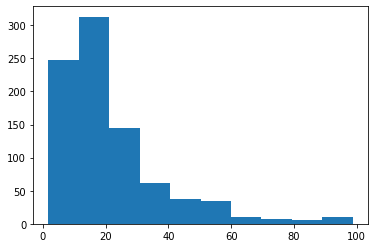

In [15]:
plt.hist(under100cad.price_cad);

#### explore sellers with top sales

In [146]:
df.sort_values(['price_cad'],ascending=False)

,header,price_cad,sales,seller,details,description,availability,num_reviews
771,The Patriot Premium Paracord Bracelet,637.08,951.0,ValhallaParacord,No info,The Patriot - Premium Edition. The bracelet f...,In stock,213
617,The Odin AllFather X The Fallen Decurion Skull...,233.69,274.0,THREEBRCLT,"['Handmade item', 'Materials: Copper', 'Made t...",Video Showcase :https://youtu.be/1RYVdwhQSZ0ht...,Low in stock,58
610,The Undead Viking With Skull Army Premium Para...,229.52,274.0,THREEBRCLT,No info,Video :https://youtu.be/5ZjEu2sOYkMaterials- T...,Low in stock,58
278,The Twin Demon Samurai & Raijin Shield with Ma...,219.99,274.0,THREEBRCLT,No info,Video Reference :https://youtu.be/Wgz6vhX7x2AM...,Low in stock,58
444,"Paracord Bracelet Snake, Viking bracelet, Tote...",214.22,744.0,ARHAIKAua,"['Handmade item', 'Materials: Bronze', 'Made t...",Made of:✅ Premium 550 Paracord with exclusive ...,In stock,152
507,"Paracord Bracelet Snake, Viking bracelet, Tote...",214.22,744.0,ARHAIKAua,"['Handmade item', 'Materials: Bronze', 'Made t...",Made of:✅ Premium 550 Paracord with exclusive ...,In stock,152
411,"Paracord Bracelet Bear, Viking bracelet, Totem...",200.31,744.0,ARHAIKAua,"['Handmade item', 'Materials: Bronze', 'Style:...",Made of:✅ Premium 550 Paracord with exclusive ...,In stock,152
662,The Twin Spartan Premium Paracord bracelet wit...,195.00,274.0,THREEBRCLT,"['Handmade item', 'Materials: Brass', 'Adjusta...",Video showcase. https://youtu.be/6kBoejnV1o0Ma...,Low in stock,58
582,The Twin Spartan Premium Paracord bracelet wit...,195.00,274.0,THREEBRCLT,"['Handmade item', 'Materials: Brass', 'Adjusta...",Video showcase. https://youtu.be/6kBoejnV1o0Ma...,Low in stock,58
138,The Demon Oni X Demon Samurai with Raijin Shie...,195.00,274.0,THREEBRCLT,"['Handmade item', 'Materials: Brass', 'Made to...",Video :https://youtu.be/6npk-sPKVEMaterials. -...,Low in stock,58


#### made to order

In [166]:
df['made_to_order'] = np.nan
df.loc[df.details.str.contains('Made to Order') == True,'made_to_order'] = 'Yes'
df.loc[df.details.str.contains('Made to Order') == False,'made_to_order'] = 'No'

In [167]:
df.head()

,header,price_cad,sales,seller,details,description,availability,num_reviews,made_to_order
0,ZERO | paracord men/women fashion bracelet,8.18,121.0,blacksquirrel2019,"['Handmade item', 'Materials: Nylon', 'Adjusta...",ZERO by BlackSquirrel is an ultra-minimal brac...,In stock,26,Yes
1,Black Paracord Survival Bracelet w/ Fishing Li...,19.99,169.0,SterlingSurvival,"['Handmade item', 'Materials: Plastic', 'Adjus...",**COVID-19 ANNOUNCEMENT: The current global pa...,In stock,20,No
2,Wide-cuffed Paracord Bracelet!,30.00,1.0,GorillaCordzCanada,"['Handmade item', 'Materials: Paracord', 'Adju...","Durable and rugged enough for the outdoors, st...",In stock,0,Yes
3,Stylish Paracord Bracelet,8.75,29.0,BraceletsandbeyondCa,"['Handmade item', 'Materials: Nylon', 'Adjusta...","Stylish Paracord BraceletHandmade""A Must Have""...",In stock,10,No
4,Paracord 7” Bracelets,6.50,179.0,BrigsSandP,"['Handmade item', 'Materials: Paracord', 'Adju...","Video Game, Character & Dragon Paracord Bracel...",In stock,34,No


#### personalized

In [13]:
df.details[169]

"['Handmade item', 'Materials: Wood', 'Closure: Toggle', 'Adjustable: No', 'Can be personalised: No', 'Made to Order']"

In [9]:
df.details[df.details.str.contains('Personalize')]

Series([], Name: details, dtype: object)

In [173]:
df.details

0      ['Handmade item', 'Materials: Nylon', 'Adjusta...
1      ['Handmade item', 'Materials: Plastic', 'Adjus...
2      ['Handmade item', 'Materials: Paracord', 'Adju...
3      ['Handmade item', 'Materials: Nylon', 'Adjusta...
4      ['Handmade item', 'Materials: Paracord', 'Adju...
5      ['Handmade item', 'Materials: Nylon', 'Adjusta...
6                                                No info
7      ['Handmade item\n\nBracelet width: 4 Millimetr...
8                                                No info
9      ['Handmade item', 'Materials: Paracord', 'Adju...
10     ['Handmade item', 'Materials: parachute cord, ...
11     ['Handmade item', 'Can be personalised: No', '...
12     ['Handmade item', 'Materials: parachute cord, ...
13     ['Handmade item', 'Materials: Brass', 'Adjusta...
14                                               No info
15     ['Handmade item', 'Materials: Nylon', 'Can be ...
16     ['Handmade item', 'Materials: Stainless steel'...
17     ['Handmade item', 'Mater

In [ ]:
df['personalized'] = np.nan
df.loc[df.details.str.contains('Made to Order') == True,'made_to_order'] = 'Yes'
df.loc[df.details.str.contains('Made to Order') == False,'made_to_order'] = 'No'

#### 2. header

In [15]:
#remove punctuation
import string 
def remove_punc(text):
    no_punct = "".join([i for i in text if i not in string.punctuation])
    return no_punct

In [16]:
no_punct = df.header.str.lower().apply(remove_punc).str.strip()

In [17]:
no_punct

0               zero  paracord menwomen fashion bracelet
1      black paracord survival bracelet w fishing lin...
2                           widecuffed paracord bracelet
3                              stylish paracord bracelet
4                                  paracord 7” bracelets
5                           paracord bracelets hand made
6      mad max inspired adjustable paracord survival ...
7      mens paracord bracelet paracord bracelet mens ...
8      adjustable paracord bracelet rope bracelet par...
9      valknut  paracord bracelet with exclusive amul...
10     paracord bracelet black bracelet men and women...
11                                     paracord bracelet
12     paracord bracelet white bracelet men and women...
13     paracord bracelet with predator brass shackle ...
14     conquistador paracord survival bracelet handma...
15     paracord bracelets paracord keychains adult pa...
16     paracord nautical bracelet black bracelet brac...
17     cordbraid viking paracor

In [68]:
#split long words
import wordninja
import itertools
flatten = itertools.chain.from_iterable

def split_long_word(text):
    print(text.split())
    split = [['paracord'] if i == 'paracord' else wordninja.split(i) for i in text.split()]
    return list(flatten(split))

In [85]:
split_words = no_punct.apply(split_long_word)

['zero', 'paracord', 'menwomen', 'fashion', 'bracelet']
['black', 'paracord', 'survival', 'bracelet', 'w', 'fishing', 'line', 'tinder', 'built', 'inbuckle', 'includes', 'whistle', 'fire', 'rod', 'and', 'striker', 'and', 'compass']
['widecuffed', 'paracord', 'bracelet']
['stylish', 'paracord', 'bracelet']
['paracord', '7”', 'bracelets']
['paracord', 'bracelets', 'hand', 'made']
['mad', 'max', 'inspired', 'adjustable', 'paracord', 'survival', 'bracelet', 'various', 'colours', 'uk']
['mens', 'paracord', 'bracelet', 'paracord', 'bracelet', 'mens', 'personalized', 'surfer', 'paracord', 'bracelet']
['adjustable', 'paracord', 'bracelet', 'rope', 'bracelet', 'paracord', 'gift', 'adjustable', 'multicoloured', 'paracord', 'bracelet']
['valknut', 'paracord', 'bracelet', 'with', 'exclusive', 'amulet', 'valknut', 'with', 'runic', 'circle', 'futhark']
['paracord', 'bracelet', 'black', 'bracelet', 'men', 'and', 'women', 'bracelet', 'survival', 'bracelet']
['paracord', 'bracelet']
['paracord', 'bracel

['predator', 'paracord', 'bracelet']
['cobra', 'paracord', 'bracelet', 'snake', 'bracelet', 'paracord', 'bead', 'in', 'cobra', 'style', 'gift', 'for', 'him', 'animal', 'theme', 'handmade', 'personal', 'and', 'customizable']
['orange', 'paracord', 'bracelet']
['paracord', 'bracelet']
['fathers', 'day', 'gift', 'anklet', 'bullet', 'bracelet', 'fishhook', 'anchor', 'paracord', 'mens', 'groomsmen', 'black', '275', 'lb', 'cord']
['trump', 'paracord', 'bracelet']
['cord', 'bayonet', 'men', 'paracord', 'bracelet', 'of', 'extra', 'classvarious', 'colors']
['navy', 'paracord', 'bracelet']
['premium', 'paracord', 'bracelet', 'dragon', 'men', 'accessory', 'edc', 'paracord', 'bracelet', 'mens', 'bracelet', 'military', 'bracelet', 'paracord', 'jewelry', 'men', 'women']
['the', 'hannya', 'mask', 'premium', 'paracord', 'bracelet', 'by', 'threebrclt', 'oni', 'mask', 'samurai', 'assassin', 'spartan', 'japanese', 'ronin', 'warrior', 'viking', 'demon', 'oni']
['the', 'demon', 'oni', 'x', 'demon', 'hannya

['thin', 'blue', 'line', 'paracord', 'bracelet']
['paracord', 'survival', 'bracelet', 'custom', 'paracord', 'bracelet', 'mens', 'paracord', 'bracelet']
['detroit', 'tigers', 'bracelet', 'paracord', 'bracelet', 'baseball', 'bracelet', 'unisex', 'adult', 'bracelet', 'childs', 'bracelet', 'fan', 'gear', 'gift']
['his', 'and', 'hers', 'thin', 'purple', 'line', 'paracord', 'bracelet']
['paracord', 'bracelet', 'blue', 'white', 'with', 'side', 'release', 'buckle', 'cobrafishtailcriss', 'crossbaseballcat', 'clawshark', 'jaw', 'bonedotted', 'blazeduality']
['bulk', 'double', 'color', 'lot', 'of', '10', 'paracord', 'bracelets']
['adjustable', 'paracord', 'bracelet', 'green', 'and', 'yellow', 'paracord', 'bracelet', 'mengift', 'for', 'himgift', 'for', 'menbrutal', 'style']
['celtic', 'leaf', 'bracelet', 'green', 'man', 'bracelet', 'jack', 'in', 'the', 'green', 'paracord', 'bracelet', 'irish', 'jewelry', 'ireland', 'celtic', 'gifts', 'nature', 'bracelets', 'face']
['skull', 'bracelet', 'skull', 'a

In [86]:
split_words

0        [zero, paracord, men, women, fashion, bracelet]
1      [black, paracord, survival, bracelet, w, fishi...
2                     [wide, cuffed, paracord, bracelet]
3                          [stylish, paracord, bracelet]
4                               [paracord, 7, bracelets]
5                      [paracord, bracelets, hand, made]
6      [mad, max, inspired, adjustable, paracord, sur...
7      [mens, paracord, bracelet, paracord, bracelet,...
8      [adjustable, paracord, bracelet, rope, bracele...
9      [val, knut, paracord, bracelet, with, exclusiv...
10     [paracord, bracelet, black, bracelet, men, and...
11                                  [paracord, bracelet]
12     [paracord, bracelet, white, bracelet, men, and...
13     [paracord, bracelet, with, predator, brass, sh...
14     [conquistador, paracord, survival, bracelet, h...
15     [paracord, bracelets, paracord, keychains, adu...
16     [paracord, nautical, bracelet, black, bracelet...
17     [cord, braid, viking, pa

In [78]:
# remove stopwords
from nltk.corpus import stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [80]:
no_sw = split_words.apply(remove_stopwords)

In [84]:
no_sw

0        [zero, paracord, men, women, fashion, bracelet]
1      [black, paracord, survival, bracelet, w, fishi...
2                     [wide, cuffed, paracord, bracelet]
3                          [stylish, paracord, bracelet]
4                               [paracord, 7, bracelets]
5                      [paracord, bracelets, hand, made]
6      [mad, max, inspired, adjustable, paracord, sur...
7      [mens, paracord, bracelet, paracord, bracelet,...
8      [adjustable, paracord, bracelet, rope, bracele...
9      [val, knut, paracord, bracelet, exclusive, amu...
10     [paracord, bracelet, black, bracelet, men, wom...
11                                  [paracord, bracelet]
12     [paracord, bracelet, white, bracelet, men, wom...
13     [paracord, bracelet, predator, brass, shackle,...
14     [conquistador, paracord, survival, bracelet, h...
15     [paracord, bracelets, paracord, keychains, adu...
16     [paracord, nautical, bracelet, black, bracelet...
17     [cord, braid, viking, pa

In [81]:
#lemmatization
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.tag import pos_tag

lemmatizer = WordNetLemmatizer()
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [82]:
def lemma_text(text):
    lemma = []
    for token, tag in pos_tag(text):
        lemma1 = lemmatizer.lemmatize(token,tag_map[tag[0]])
        lemma.append(lemma1)
    return lemma

In [83]:
no_sw.apply(lemma_text)

0        [zero, paracord, men, woman, fashion, bracelet]
1      [black, paracord, survival, bracelet, w, fish,...
2                     [wide, cuffed, paracord, bracelet]
3                          [stylish, paracord, bracelet]
4                                [paracord, 7, bracelet]
5                       [paracord, bracelet, hand, make]
6      [mad, max, inspire, adjustable, paracord, surv...
7      [men, paracord, bracelet, paracord, bracelet, ...
8      [adjustable, paracord, bracelet, rope, bracele...
9      [val, knut, paracord, bracelet, exclusive, amu...
10     [paracord, bracelet, black, bracelet, men, wom...
11                                  [paracord, bracelet]
12     [paracord, bracelet, white, bracelet, men, wom...
13     [paracord, bracelet, predator, brass, shackle,...
14     [conquistador, paracord, survival, bracelet, h...
15     [paracord, bracelet, paracord, keychains, adul...
16     [paracord, nautical, bracelet, black, bracelet...
17     [cord, braid, viking, pa

#### 2. header

In [87]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [96]:
df.header.str.lower()

0             zero | paracord men/women fashion bracelet
1      black paracord survival bracelet w/ fishing li...
2                         wide-cuffed paracord bracelet!
3                              stylish paracord bracelet
4                                  paracord 7” bracelets
5                           paracord bracelets hand made
6      mad max inspired adjustable paracord survival ...
7      mens paracord bracelet! paracord bracelet mens...
8      adjustable paracord bracelet, rope bracelet, p...
9      valknut - paracord bracelet with exclusive amu...
10     paracord bracelet, black bracelet, men and wom...
11                                     paracord bracelet
12     paracord bracelet, white bracelet, men and wom...
13     paracord bracelet with predator brass shackle,...
14     conquistador paracord survival bracelet handma...
15     paracord bracelets, paracord keychains, adult ...
16     paracord nautical bracelet, black bracelet, br...
17     cordbraid viking paracor

In [93]:
header1 = df.header.str.lower().apply(lambda x: x + ' ')

In [97]:
header1 = ''.join(list(flatten(header1)))

In [99]:
header1

'zero | paracord men/women fashion bracelet black paracord survival bracelet w/ fishing line & tinder built in,buckle includes whistle, fire rod and striker, and compass wide-cuffed paracord bracelet! stylish paracord bracelet paracord 7” bracelets paracord bracelets hand made mad max inspired adjustable paracord survival bracelet - various colours uk mens paracord bracelet! paracord bracelet mens. personalized surfer paracord bracelet. adjustable paracord bracelet, rope bracelet, paracord gift. adjustable multi-coloured paracord bracelet valknut - paracord bracelet with exclusive amulet - valknut with runic circle (futhark) paracord bracelet, black bracelet, men and women bracelet, survival bracelet paracord bracelet paracord bracelet, white bracelet, men and women bracelet, survival bracelet paracord bracelet with predator brass shackle, valkyrie bead, viking jewelry, gift for him, mens bangle, armband, viking jewelry conquistador paracord survival bracelet handmade in the uk paracor

In [100]:
# remove punctuation
header2 = remove_punc(header1)

In [101]:
header2

'zero  paracord menwomen fashion bracelet black paracord survival bracelet w fishing line  tinder built inbuckle includes whistle fire rod and striker and compass widecuffed paracord bracelet stylish paracord bracelet paracord 7” bracelets paracord bracelets hand made mad max inspired adjustable paracord survival bracelet  various colours uk mens paracord bracelet paracord bracelet mens personalized surfer paracord bracelet adjustable paracord bracelet rope bracelet paracord gift adjustable multicoloured paracord bracelet valknut  paracord bracelet with exclusive amulet  valknut with runic circle futhark paracord bracelet black bracelet men and women bracelet survival bracelet paracord bracelet paracord bracelet white bracelet men and women bracelet survival bracelet paracord bracelet with predator brass shackle valkyrie bead viking jewelry gift for him mens bangle armband viking jewelry conquistador paracord survival bracelet handmade in the uk paracord bracelets paracord keychains ad

In [103]:
#split long words
def split_long_word(text):
    split = [['paracord'] if i == 'paracord' else wordninja.split(i) for i in text.split()]
    return list(flatten(split))

In [107]:
header3 = ' '.join(split_long_word(header2))

In [108]:
header3

'zero paracord men women fashion bracelet black paracord survival bracelet w fishing line tinder built in buckle includes whistle fire rod and striker and compass wide cuffed paracord bracelet stylish paracord bracelet paracord 7 bracelets paracord bracelets hand made mad max inspired adjustable paracord survival bracelet various colours uk mens paracord bracelet paracord bracelet mens personalized surfer paracord bracelet adjustable paracord bracelet rope bracelet paracord gift adjustable multi coloured paracord bracelet val knut paracord bracelet with exclusive amulet val knut with runic circle fu th ark paracord bracelet black bracelet men and women bracelet survival bracelet paracord bracelet paracord bracelet white bracelet men and women bracelet survival bracelet paracord bracelet with predator brass shackle valkyrie bead viking jewelry gift for him mens bangle armband viking jewelry conquistador paracord survival bracelet handmade in the uk paracord bracelets paracord keychains 

In [110]:
#lemmatization
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

header4 = []
for i in header3.split():
    header4.append(WordNetLemmatizer().lemmatize(i))
header4 = ' '.join(header4)

In [119]:
header4

'zero paracord men woman fashion bracelet black paracord survival bracelet w fishing line tinder built in buckle includes whistle fire rod and striker and compass wide cuffed paracord bracelet stylish paracord bracelet paracord 7 bracelet paracord bracelet hand made mad max inspired adjustable paracord survival bracelet various colour uk men paracord bracelet paracord bracelet men personalized surfer paracord bracelet adjustable paracord bracelet rope bracelet paracord gift adjustable multi coloured paracord bracelet val knut paracord bracelet with exclusive amulet val knut with runic circle fu th ark paracord bracelet black bracelet men and woman bracelet survival bracelet paracord bracelet paracord bracelet white bracelet men and woman bracelet survival bracelet paracord bracelet with predator brass shackle valkyrie bead viking jewelry gift for him men bangle armband viking jewelry conquistador paracord survival bracelet handmade in the uk paracord bracelet paracord keychains adult p

In [139]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width = 800, height = 400, background_color="white",max_words= 50).generate(header4)

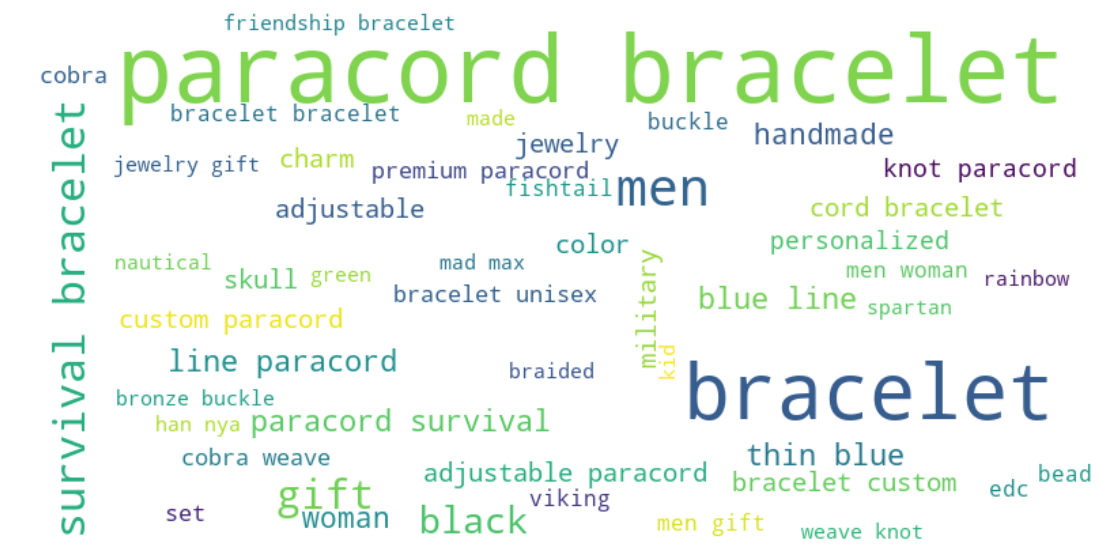

In [140]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [141]:
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>